In [1]:
# The data was taken from the UCI-ML archive here: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)
# The file ‘data.txt’ has 32 columns, first one of which is the identifier, second
# column is the diagnosis (benign/malignant) and the rest of the 30 columns represent the
# features derived from the fine needle biopsy of the breast mass. They describe the
# characteristics of the cell nuclei present in the image. Names of these features are provided in
# the ‘features.txt’ file for your reference
 
# Task was to build a ML model and report the model performance with confusion matrices, accuracy scores, and auc_roc_curves.

In [2]:
# Install required packages
#!pip install numpy
#!pip install pandas
#!pip install seaborn
#!pip install sklearn
#!pip install scipy
#!pip install pingouin

In [1015]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1016]:
# PART I (Identifying missing values and imputation, distribution of each of the features, summary statistics, 
# standard scaling, heatmaps and clustering, differences between benign and malignant and top 5 features )

In [1017]:
df = pd.read_csv('data.txt')

In [1018]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,NaN,20.38,77.58,NaN,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [1019]:
#this gives the datatype of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              541 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                528 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_sd                569 non-null    float64
 13  texture_sd               569 non-null    float64
 14  perimeter_sd             5

In [1020]:
#this gives the summary statistics of each of the features
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,541.000000,569.000000,569.000000,528.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.175410,19.289649,91.969033,659.519697,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.527352,4.301036,24.298981,351.435482,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,170.400000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.740000,16.170000,75.170000,420.875000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.400000,18.840000,86.240000,555.900000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,16.020000,21.800000,104.100000,798.050000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [1021]:
#Indentifying the columns with missing values and count of missing values in each of the columns (NaN)
df.isnull().sum()

id                          0
diagnosis                   0
radius_mean                28
texture_mean                0
perimeter_mean              0
area_mean                  41
smoothness_mean             0
compactness_mean            0
concavity_mean              0
concave_points_mean         0
symmetry_mean               0
fractal_dimension_mean      0
radius_sd                   0
texture_sd                  0
perimeter_sd                0
area_sd                     0
smoothness_sd               0
compactness_sd              0
concavity_sd                0
concave_points_sd           0
symmetry_sd                 0
fractal_dimension_sd        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst             0
concave_points_worst        0
symmetry_worst              0
fractal_dimension_worst     0
dtype: int64

In [1022]:
#Taking care of missing data and imputing the missing values
df['radius_mean'] = df['radius_mean'].fillna(df['radius_mean'].mean())
df['area_mean'] = df['area_mean'].fillna(df['area_mean'].mean())

In [1023]:
#handling categorical data by converting it into numerical values
df['diagnosis'].unique()
df['diagnosis'] = df['diagnosis'].map({'B':0,'M':1})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99000,10.38,122.80,1001.000000,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57000,17.77,132.90,1326.000000,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69000,21.25,130.00,1203.000000,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,14.17541,20.38,77.58,659.519697,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29000,14.34,135.10,1297.000000,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Text(0.5, 1.0, 'number of Benign_0 vs Malignant_1')

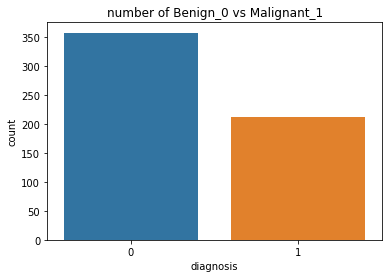

In [1024]:
#visualizing the count of the dependent/target variable -diagnosis column >>> 'benign':0,'malignant':1
sns.countplot(x='diagnosis',data = df)
plt.title('number of Benign_0 vs Malignant_1')

<ipython-input-1025-976c379f89d0>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)


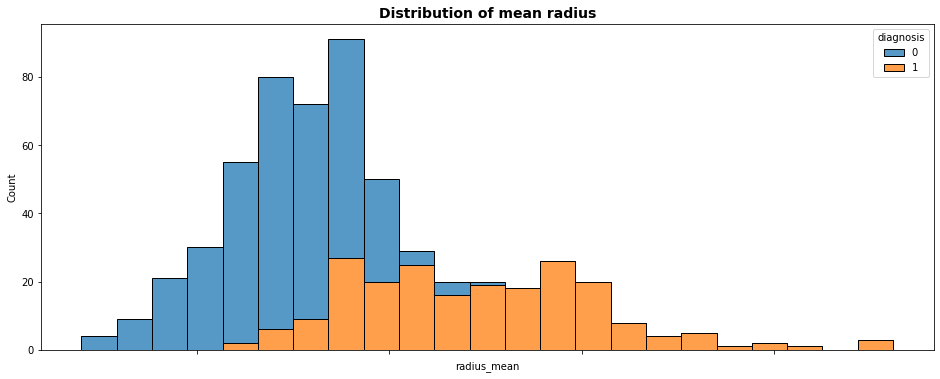

In [1025]:
## Plotting an stacked histogram plot howing the distribution of mean radius among the benign and malignant patient samples
plt.figure(figsize=(16,6))
ax = sns.histplot(x='radius_mean', data=df, hue='diagnosis', multiple='stack')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.title('Distribution of mean radius', fontsize=14, fontweight='bold')
plt.show()

<ipython-input-1026-523ca105e263>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)


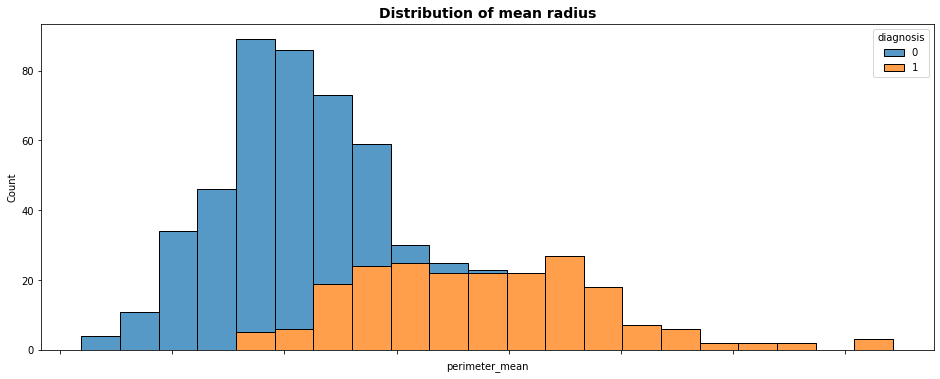

In [1026]:
## Plotting an stacked histogram plot showing the distribution of mean radius among the benign and malignant patient samples 
plt.figure(figsize=(16,6))
ax = sns.histplot(x='perimeter_mean', data=df, hue='diagnosis', multiple='stack')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.title('Distribution of mean radius', fontsize=14, fontweight='bold')
plt.show()

In [1027]:
#function to get the statistics and plot the histogram of individual features
def get_statistics(data, bins=20):
    '''Prints basic statistics from the input data. 
    Syntax: get_statistics(data, bins=30), where:
        data = the input data series;
        bins = the number of bins to the histogram.
    '''
    total = data.values
    print('Mean:', np.mean(total))
    print('Standard deviation:', np.std(total))
    print('Minimum:', np.min(total))
    print('Maximum:', np.max(total))
    print('Median:', np.median(total))
    plt.hist(data, bins=bins)

Mean: 91.96903339191564
Standard deviation: 24.27761929305318
Minimum: 43.79
Maximum: 188.5
Median: 86.24


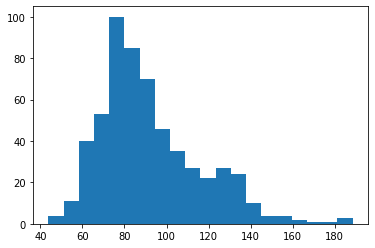

In [1028]:
#looking at the distribution of 'perimeter_mean' feature
get_statistics(df.perimeter_mean)

Mean: 880.5831282952548
Standard deviation: 568.8564589532671
Minimum: 185.2
Maximum: 4254.0
Median: 686.5


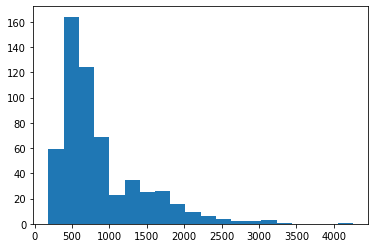

In [1029]:
#looking at the distribution of 'area_worst' feature
get_statistics(df.area_worst)

In [117]:
#removing the unnecessary columns
exclude = ['id']
df_features = df.drop(exclude, axis = 1)

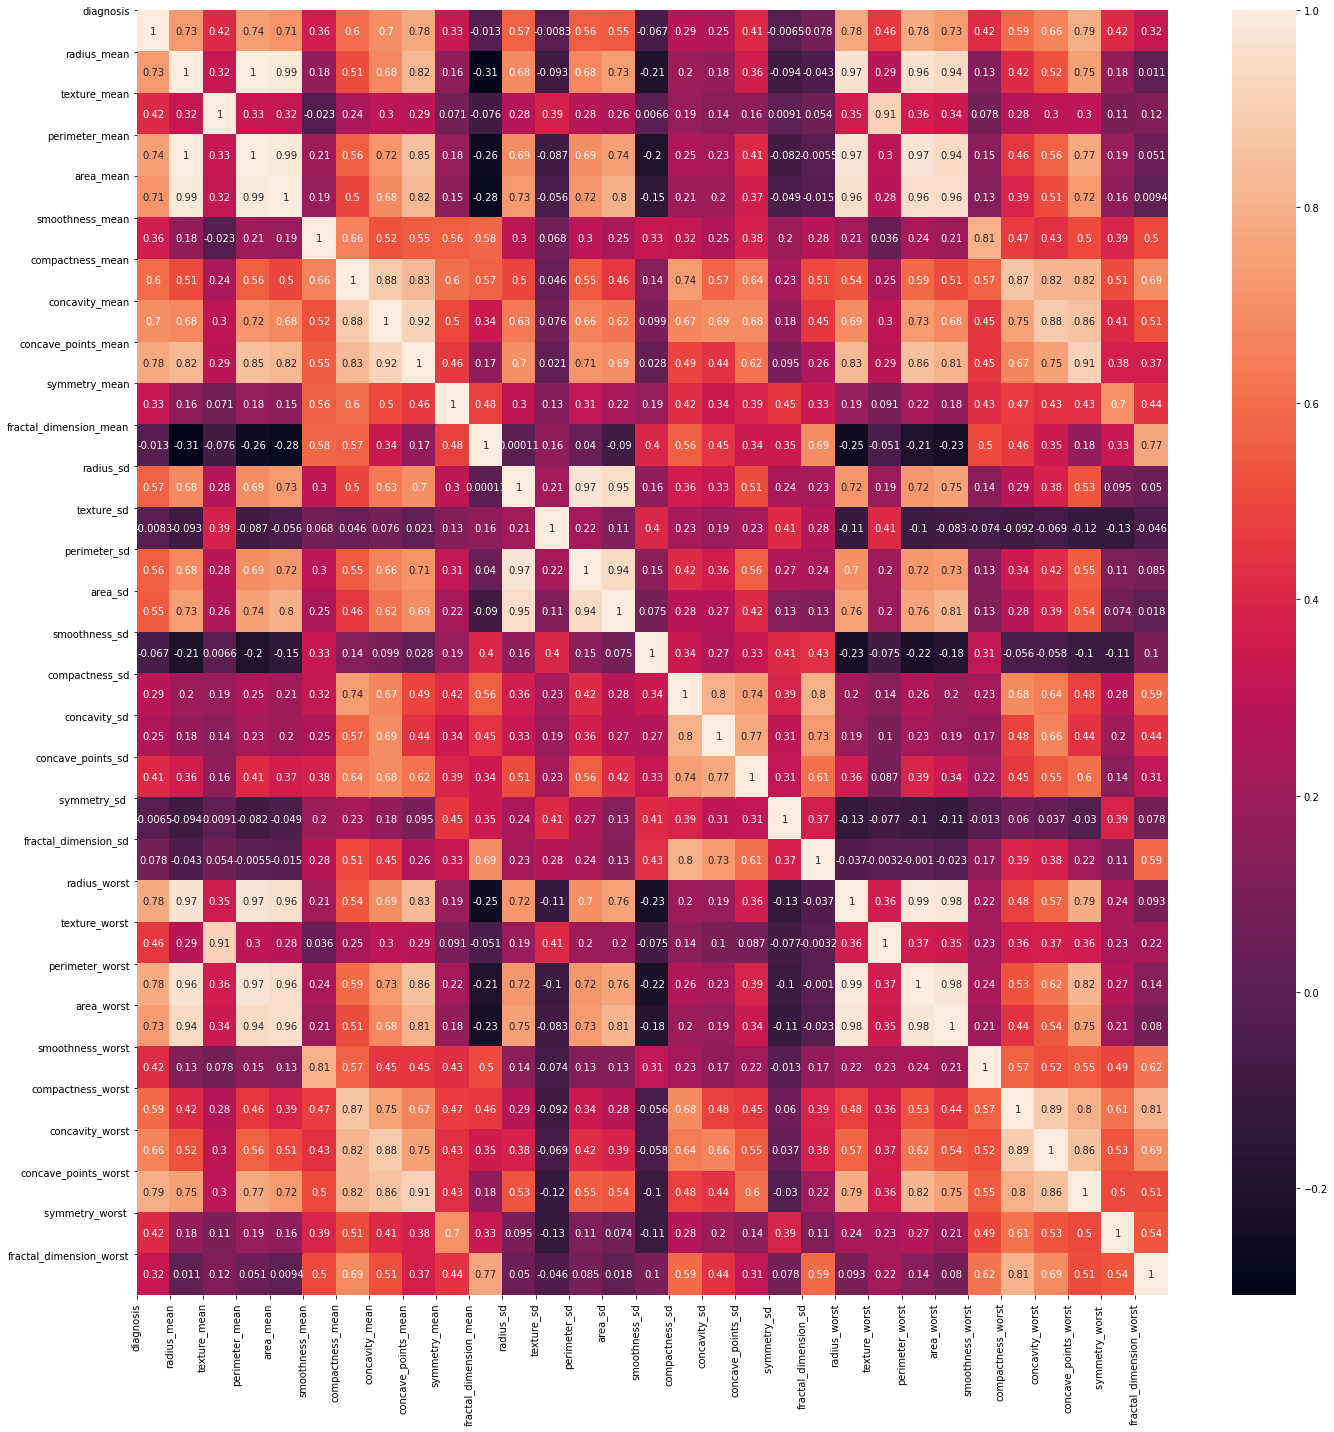

In [118]:
#Correlation plot between the features and target
correl_fig,ax=plt.subplots(1,1,figsize=(20,20),)
indexax=np.arange(0,len(df_features.columns))
corr=(df_features.corr().values)
sns.heatmap(df_features.corr(), annot=True)
ax.set_xticks(indexax)
ax.set_xticklabels(df_features.columns)
ax.set_yticks(indexax)
ax.set_yticklabels(df_features.columns)
correl_fig.tight_layout()
plt.show()

In [85]:
from scipy.cluster import hierarchy

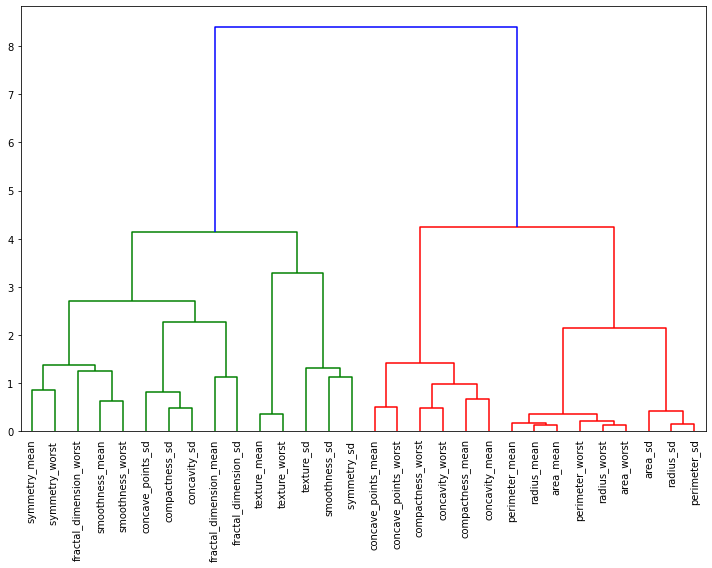

In [86]:
corr_fig1,ax1=plt.subplots(1,1,figsize=(10, 8),)
# Compute pair wise correlations
corr=df_features.corr().values

# Compute the hierarchical clustering tree
link=hierarchy.ward(corr)
dendro=hierarchy.dendrogram(link,labels=df_features.columns,ax=ax1,leaf_rotation=90,leaf_font_size=10)
dendro_index=np.arange(0,len(dendro["ivl"]))
corr_fig1.tight_layout()
plt.show()
corr_fig1.savefig("corrtree.png")

Text(0.5, 1.0, 'Corr. between features and target')

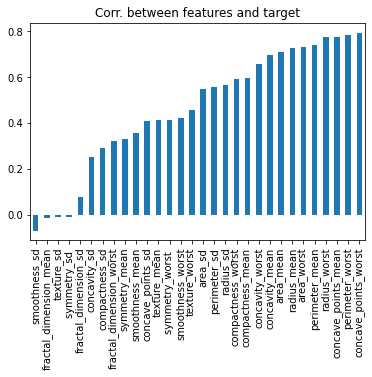

In [106]:
# correlation between features
df.corr()['diagnosis'][2:].sort_values().plot(kind ='bar')
plt.title('Corr. between features and target')

#The top 5 highly correlated fieatures are 'concave_points_worst', 'perimeter_worst', 
#'concave_points_mean', 'radius_worst', 'perimeter_mean' 

<AxesSubplot:>

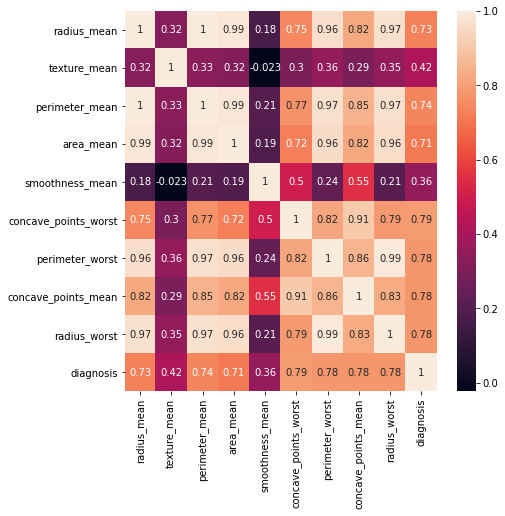

In [107]:
#correlation between features and target (diagnosis)
plt.figure(figsize=(7,7))
sns.heatmap(df['radius_mean texture_mean perimeter_mean area_mean smoothness_mean concave_points_worst perimeter_worst concave_points_mean radius_worst diagnosis'.split()].corr(), annot=True)

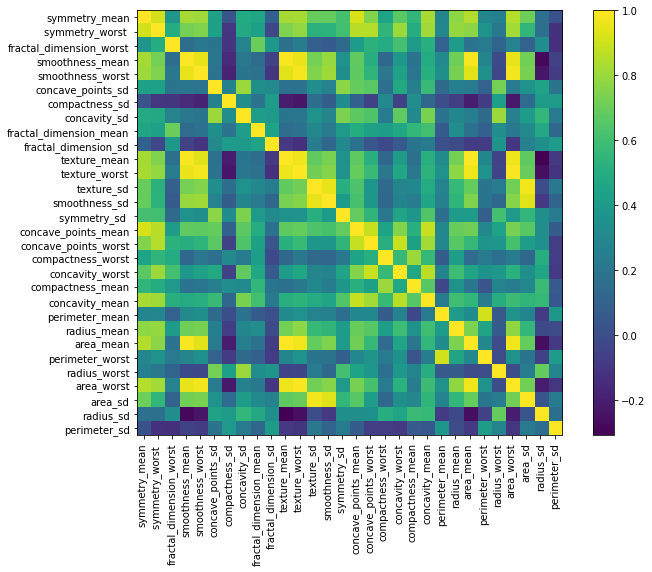

In [131]:
# Compute the correlation heat map
corr_fig2,ax2=plt.subplots(1,1,figsize=(10, 8),)
im=ax2.imshow(corr[dendro["leaves"],:][:,dendro["leaves"]])
ax2.set_xticks(dendro_index)
ax2.set_yticks(dendro_index)
ax2.set_xticklabels(np.array(dendro["ivl"]),rotation="vertical")
ax2.set_yticklabels(np.array(dendro["ivl"]))
corr_fig2.tight_layout()
plt.colorbar(im)
plt.show()
corr_fig2.savefig("corrmap.png")

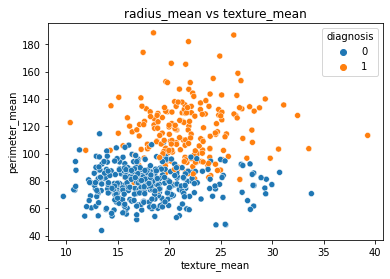

In [104]:
#Visualizing distribution of individual sets of features
sns.scatterplot(x = 'texture_mean', y = 'perimeter_mean', hue = 'diagnosis', data = df)
plt.title('radius_mean vs texture_mean')
plt.show()

In [89]:
#visualizing distribution and assigning different colors to the dependent variable
palette ={0 : 'green', 1 : 'red'}
edgecolor = 'grey'
fig = plt.figure(figsize=(7, 7))

<Figure size 504x504 with 0 Axes>

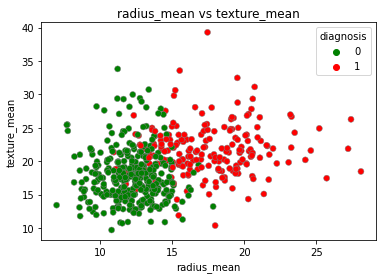

In [90]:
#correlation between radius mean and texture mean
ax1 = sns.scatterplot(x = df['radius_mean'], y = df['texture_mean'], hue = "diagnosis",
data = df, palette =palette, edgecolor=edgecolor)
plt.title('radius_mean vs texture_mean')
plt.show()

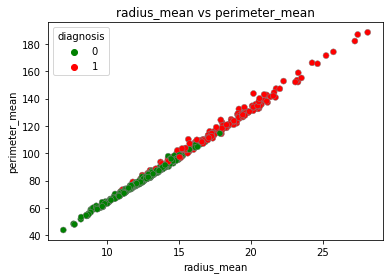

In [91]:
# Radius mean and perimeter mean have a very good correlation, close to 1 hence we see the point aligned on the slope
ax2 = sns.scatterplot(x = df['radius_mean'], y = df['perimeter_mean'], hue = "diagnosis",
data = df, palette =palette, edgecolor=edgecolor)
plt.title('radius_mean vs perimeter_mean')
plt.show()

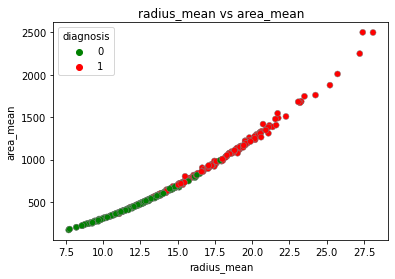

In [92]:
#Radius mean and area mean also have a very good correlation
ax2 = sns.scatterplot(x = df['radius_mean'], y = df['area_mean'], hue = "diagnosis",
data = df, palette =palette, edgecolor=edgecolor)
plt.title('radius_mean vs area_mean')
plt.show()

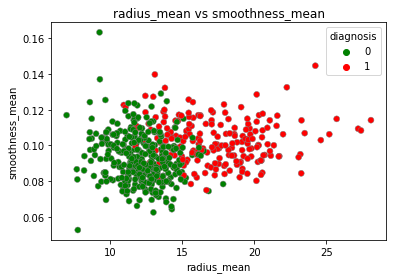

In [93]:
ax4 = sns.scatterplot(x = df['radius_mean'], y = df['smoothness_mean'], hue = "diagnosis",
data = df, palette =palette, edgecolor=edgecolor)
plt.title('radius_mean vs smoothness_mean')
plt.show()

In [257]:
display(df)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,NaN,20.38,77.58,NaN,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,NaN,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
# PART II

In [278]:
#importing required libraries for statistical analysis
import pandas as pd
from scipy import stats
import pingouin as pg
#import statsmodels.api as sm
#from statsmodels.formula.api import ol

In [279]:
# Radius mean from malignant diagnosis
df1=df[df['diagnosis']==1]
df1_sum=df1.texture_mean.sum()
df1_count=df1.texture_mean.count()
df1_mean=df1_sum/df1_count
print("df1 mean:", df1_mean)

# Radius mean from benign diagnosis
df2=df[df['diagnosis']==0]
df2_sum=df2.texture_mean.sum()
df2_count=df2.texture_mean.count()
df2_mean=df2_sum/df2_count
print("df2 mean:", df2_mean)

df1 mean: 21.60490566037736
df2 mean: 17.914761904761903


In [280]:
stats.ttest_ind(df1.texture_mean, df2.texture_mean)

Ttest_indResult(statistic=10.86720108146434, pvalue=4.0586360478980736e-25)

In [281]:
stats.ttest_ind(df1.perimeter_mean, df2.perimeter_mean)

Ttest_indResult(statistic=26.405212979192665, pvalue=8.43625103617473e-101)

In [283]:
for column_type1, column_type2 in zip(df1,df2):
    print(column_type1, stats.ttest_ind(df1[column_type1],df2[column_type2], equal_var=False, nan_policy='omit'))

id Ttest_indResult(statistic=0.9085846137851072, pvalue=0.36413452840593563)
diagnosis Ttest_indResult(statistic=inf, pvalue=0.0)
radius_mean Ttest_indResult(statistic=21.06034841199554, pvalue=2.0932205945191596e-60)
texture_mean Ttest_indResult(statistic=11.022086546579432, pvalue=3.019055292193917e-25)
perimeter_mean Ttest_indResult(statistic=22.93531376570585, pvalue=1.0231409970104587e-66)
area_mean Ttest_indResult(statistic=18.67463004353321, pvalue=3.3289227290269056e-49)
smoothness_mean Ttest_indResult(statistic=9.297355109660026, pvalue=5.573331322107757e-19)
compactness_mean Ttest_indResult(statistic=15.818245868928102, pvalue=9.607863145123788e-42)
concavity_mean Ttest_indResult(statistic=20.332424556963463, pvalue=3.742120672313664e-58)
concave_points_mean Ttest_indResult(statistic=24.84481003907913, pvalue=3.1273162856782697e-71)
symmetry_mean Ttest_indResult(statistic=8.112197650883767, pvalue=5.957650760938452e-15)
fractal_dimension_mean Ttest_indResult(statistic=-0.2968

In [332]:
from math import sqrt
from numpy import mean
from scipy.stats import sem
from scipy.stats import t
# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = mean(data1), mean(data2)
    # calculate standard errors
    se1, se2 = sem(data1), sem(data2)
    # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, p

In [1007]:
#Compile the t-test results from all the features in the form of a table with 3 columns - feature name, t-statistic and p-value.
# Reorder the rows of the table by increasing p-value. How many features do you identify as being significant by the individual t-tests done on each of them?
# Pick the top 5 features from the table and see if they match with the features you identified in Q6 and explain the differences if any

df3 = pd.DataFrame()

for column_type1, column_type2 in zip(df1,df2):
    t_stat, p_value = independent_ttest(df1[column_type1],df2[column_type2], 0.05) 
    #print(column_type1, t_stat, p_value)
    #print (np.dtype(p_value))
    df3= df3.append(pd.DataFrame(np.array([[column_type1, t_stat, p_value]]), columns=['Feature-name', 't-statistic', 'p-value']))

df3= df3.sort_values(by="p-value", ascending=False)
df3.reset_index(drop=True)

#Output
#The Top 5 significant p_values are 
#symmetry_mean - 3.11E-15
#fractal_dimension_worst - 8.37774E-13  
#compactness_sd -  4.20708E-12
#concavity_sd - 1.25466E-11
#fractal_dimension_sd - 0.042190806
#It is different from Q6 correlation result, where the top 5 highly correlated fieatures are 
#'concave_points_worst', 'perimeter_worst', 'concave_points_mean', 'radius_worst'and 'perimeter_mean' 

<ipython-input-332-e11a9badd0f1>:14: RuntimeWarning: divide by zero encountered in double_scalars
  t_stat = (mean1 - mean2) / sed


,Feature-name,t-statistic,p-value
0,fractal_dimension_worst,7.322729666528337,8.377742943821431e-13
1,compactness_sd,7.082641476498329,4.207079129514568e-12
2,symmetry_mean,8.112197650883767,3.1086244689504383e-15
3,concavity_sd,6.916304509499919,1.2546630401288894e-11
4,symmetry_sd,-0.1420551732328446,0.8870868860744725
5,texture_sd,-0.2078650220425013,0.8354090003249273
6,fractal_dimension_mean,-0.29686588789402363,0.7666776174379069
7,id,0.9085846137851072,0.36395545244043626
8,smoothness_sd,-1.6228692577349724,0.105173185135091
9,fractal_dimension_sd,2.036236488582174,0.04219080628512062


In [1011]:
# Running Bonferroni correction for multiple testing
#The Bonferroni correction provides a solution for correcting issues related to multiple comparisons.
# It corrects for Type I errors (false positives) which increases the likelihood of a significant result due to chance.
# However, Bonferroni, does not correct for Type II errors (false negatives), mistaken acceptance of null hypothesis
  
from statsmodels.stats.multitest import multipletests
numbers=[]
p_adj =[]
p_val=[]

#df3 = df3.set_index('Feature-name', inplace=True)
numbers = df3['p-value']
#display(df3)

#converting raw p-val into floats
for n in numbers:
    pval=float(n)
    p_val.append(pval)
    
p_adj = multipletests(p_val, alpha=0.05, method='bonferroni')

print ("P_adjusted following Bonferroni's correction:")
for item in (p_adj[1]):
    print(item)
    
#The top 4 hits following computation of p-adjusted value still remains the same, following multiple testing, but 
# 5th one is no longer significant
#symmetry_mean, 9.94E-14
#fractal_dimension_worst, 2.68E-11
#compactness_sd, 1.34E-10
#concavity_sd, 4.01E-10


P_adjusted following Bonferroni's correction:
2.680877742022858e-11
1.3462653214446618e-10
9.947598300641403e-14
4.014921728412446e-10
1.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [673]:
# Running PCA for dimensionality reduction - the section of code is for partII Q9
# How many principal components are needed to explain 95% variance in thedata?
# Generate PCA scores plot with PC1 on x-axis and PC2 on y-axis and label theobservations with diagnosis class.
# What do you infer from the PCA plot?

#PCA helps in transforming the data to the reduced dimension data
#Before we apply PCA, all variables should be on the smae scale
X = df.iloc[:, 2:].values # 1st column has patient IDs and 2nd column is dependent variable and was excluded from the feature matrix
y = df.iloc[:, 1].values # 2nd column is the dependent variable (B/0 for benign, M/1 for malignant)


In [674]:
#Taking care of missing data and imputing the missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, :])
X[:, :]= imputer.transform(X[:, :])

In [723]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,NaN,20.38,77.58,NaN,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [732]:
#Taking care of missing data and imputing the missing values
df['radius_mean'] = df['radius_mean'].fillna(df['radius_mean'].mean())
df['area_mean'] = df['area_mean'].fillna(df['area_mean'].mean())

In [733]:
df_features = df.drop(['id', 'diagnosis'], axis=1)

In [734]:
standardized = StandardScaler()
standardized.fit(df_features)

StandardScaler()

In [735]:
scaled_data = standardized.transform(df_features)

In [760]:

from sklearn.decomposition import PCA
pca_all= PCA (n_components=30)
pca = PCA(n_components=3)

#print('The reduced data is of the dimension: ', x_pca.shape)

In [762]:
pca_all.fit(scaled_data)
#pca.fit(scaled_data)

PCA(n_components=30)

In [763]:
#x_pca = pca.transform(scaled_data)
x_pca = pca_all.transform(scaled_data)

In [764]:
scaled_data.shape

(569, 30)

In [765]:
x_pca.shape

(569, 30)

In [766]:
def diag(x):
    if x =='M':
        return 1
    else:
        return 0
df_diag= df['diagnosis'].apply(diag)

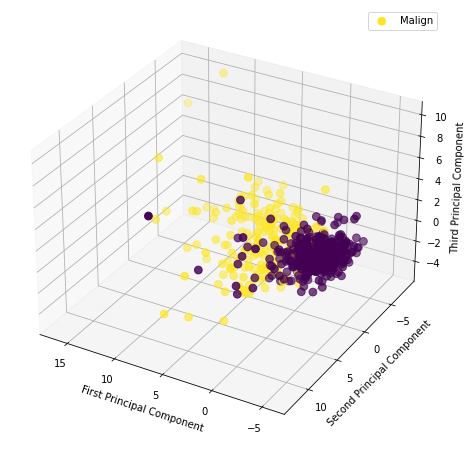

In [767]:
#plotting PCA for 3 components
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,2], c=df_diag, s=60)
ax.legend(['Malign'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(30, 120)

/home/savita/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Second Principal Component')

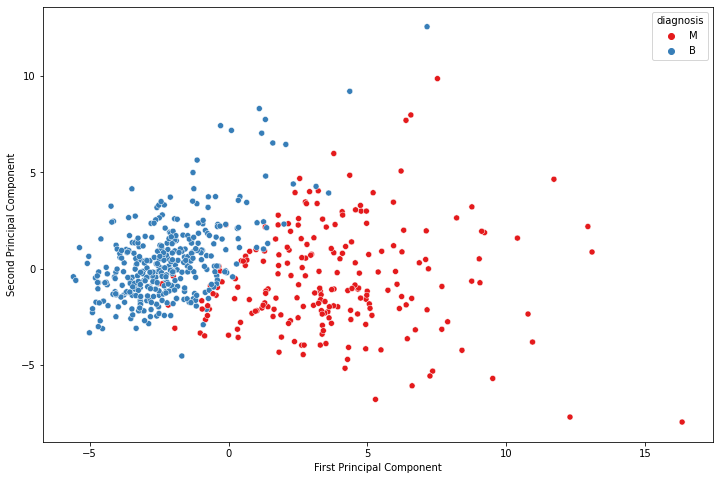

In [768]:
#plotting PCA for 1st vs 2nd principal component
ax = plt.figure(figsize=(12,8))
sns.scatterplot(x_pca[:,0], x_pca[:,1],hue=df['diagnosis'], palette ='Set1' )
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

/home/savita/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Third Principal Component')

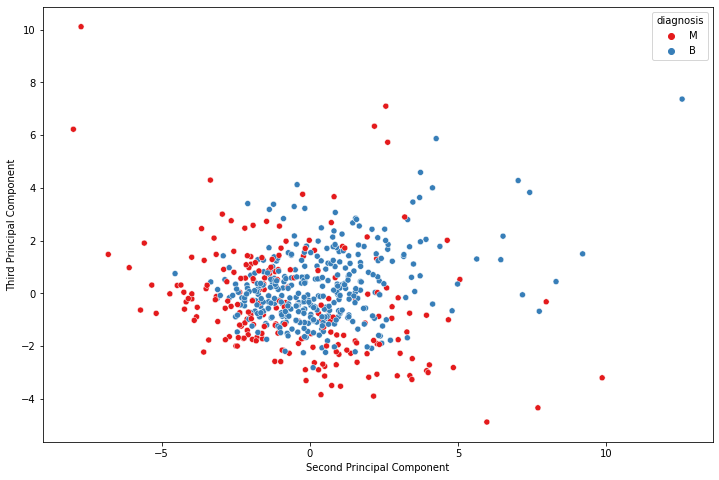

In [776]:
#plotting PCA for 2nd vs 3rd principal component
ax = plt.figure(figsize=(12,8))
sns.scatterplot(x_pca[:,1], x_pca[:,2],hue=df['diagnosis'], palette ='Set1' )
plt.xlabel('Second Principal Component')
plt.ylabel('Third Principal Component')

In [769]:
explained_variance = pca_all.explained_variance_ratio_
explained_variance 

#The first component explains 44% of the variance, and the second component explains 18% and so on..

array([4.40591578e-01, 1.88418905e-01, 9.39575945e-02, 6.60222908e-02,
       5.48911257e-02, 4.02491511e-02, 2.23964755e-02, 1.59557170e-02,
       1.41622072e-02, 1.16665258e-02, 9.85917571e-03, 8.74983316e-03,
       8.04024428e-03, 5.23367290e-03, 3.18617790e-03, 3.10663186e-03,
       2.47555271e-03, 2.04708708e-03, 1.79786737e-03, 1.38599108e-03,
       1.04794069e-03, 1.00557026e-03, 9.52769248e-04, 8.16057767e-04,
       6.30197309e-04, 5.33606524e-04, 4.16616750e-04, 2.57322043e-04,
       1.02942903e-04, 4.31719035e-05])

In [774]:
#function to make a series of 'diagnosis' variable
def diag(x):
    if x =='M':
        return 1
    else:
        return 0
df_diag= df['diagnosis'].apply(diag)

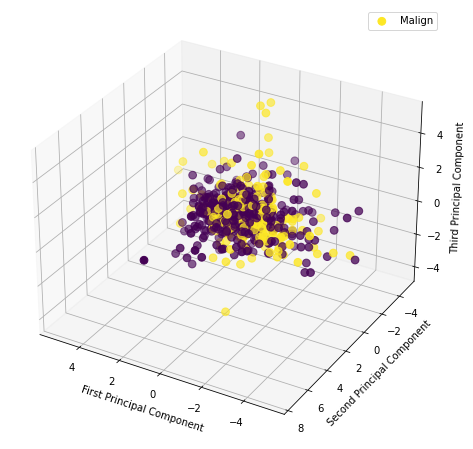

In [775]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca[:,3], x_pca[:,4], x_pca[:,5], c=df_diag, s=60)
ax.legend(['Malign'])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.view_init(30, 120)

In [ ]:
#PART III - Hypothesis Testing

In [914]:
df = pd.read_csv('data.txt')

In [915]:
#Splitting the data into feature matrix and target matrix

X = df.iloc[:, 2:].values # 1st column has patient IDs and 2nd column is dependent variable and was excluded from the feature matrix
y = df.iloc[:, 1].values # 2nd column is the dependent variable (B/0 for benign, M/1 for malignant)

In [916]:
#print(X)

In [917]:
#print(y)

In [918]:
#Taking care of missing data and imputing the missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, :])
X[:, :]= imputer.transform(X[:, :])

In [919]:
#encoding the dependent variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)
#print(y)

In [920]:
#Splitting the data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [921]:
#Feature Scaling or Standardization is done for better computation and unbiased results
#Standardization makes sure that each of the original variables contribute equally to the analysis
#Standard scaler works for all datasets and is recommended and is used to centralize and normalize the data
#While min-max or normalized scaling is used for a datasets that are normaly distributed
#Min-max scaling sets your lowest observed value to 0 and your highest observed value to 1.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [922]:
#Applying PCA dimensionality reduction before applying logistic regression

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

pca_data = pca.fit_transform(X_train)
print('The reduced data is of the dimension: ', pca_data.shape)

The reduced data is of the dimension:  (455, 2)


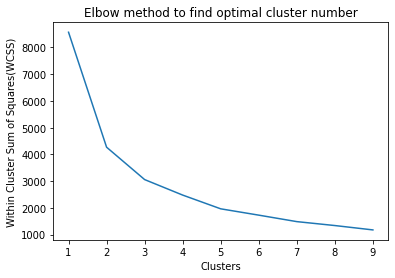

In [923]:
#K-means clustering is unsupervised ML algorithm that uses similar characteristics to form clusters
#we use the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
WCSS = []   #WCSS stands for Within Cluster Sum of Squares
for i in range(1,10):      #the for loop calculates the WCSS for each no.of cluster from 1 to 9 and at each iteration creates a K-Means algorithm for i
  kmeans = KMeans(n_clusters=i, init='random', max_iter = 300, n_init = 10, random_state=0)
  kmeans.fit(pca_data)
  WCSS.append(kmeans.inertia_)
plt.plot(range(1,10), WCSS)
plt.title('Elbow method to find optimal cluster number')
plt.xlabel('Clusters')
plt.ylabel('Within Cluster Sum of Squares(WCSS)')
plt.show()

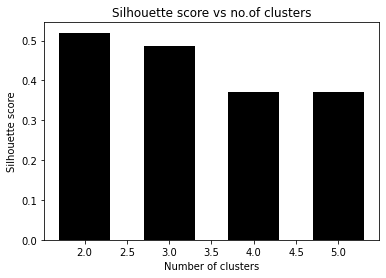

In [955]:
#calculating the performance of the algorithm
from sklearn import metrics

scores=[]
range_values = np.arange(2,6)

for i in range_values:
  kmeans = KMeans(n_clusters=i, init='random', n_init = 10, random_state=0)
  kmeans.fit(pca_data)
  score = metrics.silhouette_score(pca_data, kmeans.labels_, metric = 'euclidean', sample_size = len(pca_data))

  #print('\nNumber of clusters: ', i)
  #print('\nSilhouette score = ', score)

  scores.append(score)

#plotting the scores
plt.figure()
plt.bar(range_values, scores, width=0.6, color='k', align='center')
plt.title('Silhouette score vs no.of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [ ]:
#The elbow method is used to determine the optimal number of clusters. From this result we can use either 2, 3 or 5 clusters
#The highest Silhouette score clears this confusion and tells us that 2 cluster is optimal for enhancing model performance

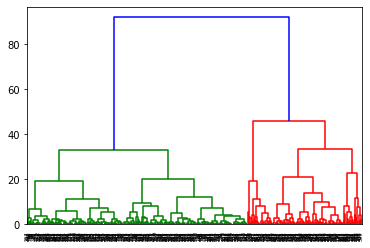

In [924]:
#Alternatively we can also use the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(pca_data, method = 'ward'))
#From this it is clear that the data can be grouped into 2 distinct clusters 

In [925]:
#Training the data on a Logistic Regression Classification Model
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state = 0)
lrc.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [926]:
#predicting test set result
y_pred = lrc.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [927]:
#Making the confusion matrix to predict accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[61  6]
 [ 3 44]]


              precision    recall  f1-score   support

           0       0.95      0.91      0.93        67
           1       0.88      0.94      0.91        47

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



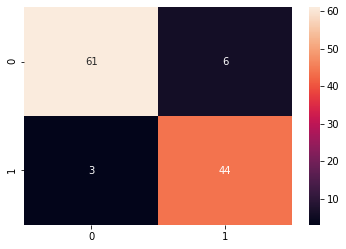

In [928]:
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

In [929]:
#Training the data on a Support Vector Classification model
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
svc_model = SVC(kernel = 'linear', random_state = 0)
svc_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [930]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = svc_model.predict(X_test)

In [931]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[61  6]
 [ 3 44]]


              precision    recall  f1-score   support

           0       0.95      0.91      0.93        67
           1       0.88      0.94      0.91        47

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



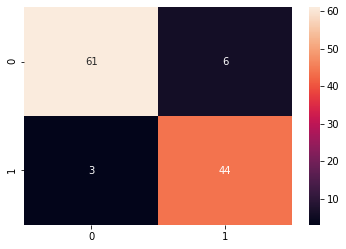

In [932]:
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

In [933]:
#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
svc_kernel_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_kernel_rbf.fit(X_train, y_train)

SVC(random_state=0)

In [934]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = svc_kernel_rbf.predict(X_test)

In [935]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[62  5]
 [ 5 42]]


              precision    recall  f1-score   support

           0       0.93      0.93      0.93        67
           1       0.89      0.89      0.89        47

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



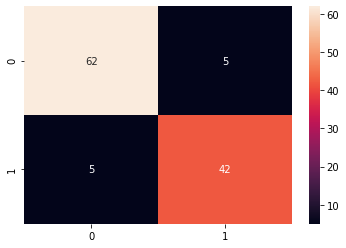

In [936]:
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

In [937]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [938]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = knn.predict(X_test)

In [939]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[61  6]
 [ 3 44]]


              precision    recall  f1-score   support

           0       0.95      0.91      0.93        67
           1       0.88      0.94      0.91        47

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



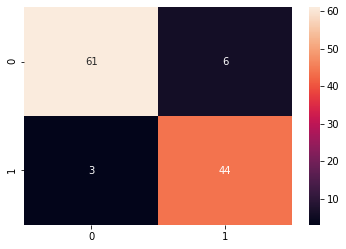

In [940]:
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

In [941]:
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
Gnb = GaussianNB()
Gnb.fit(X_train, y_train)

GaussianNB()

In [942]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = Gnb.predict(X_test)

In [943]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[61  6]
 [ 5 42]]


              precision    recall  f1-score   support

           0       0.92      0.91      0.92        67
           1       0.88      0.89      0.88        47

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



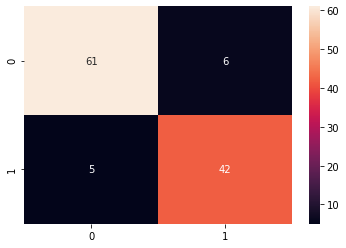

In [944]:
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

In [945]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
Dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
Dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [946]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = Dtc.predict(X_test)

In [947]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[59  8]
 [ 3 44]]


              precision    recall  f1-score   support

           0       0.95      0.88      0.91        67
           1       0.85      0.94      0.89        47

    accuracy                           0.90       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114



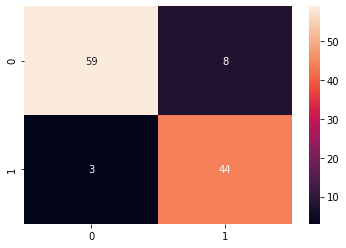

In [948]:
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

In [949]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
Rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [950]:
Y_pred = Rfc.predict(X_test)

In [951]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[59  8]
 [ 3 44]]


              precision    recall  f1-score   support

           0       0.95      0.88      0.91        67
           1       0.85      0.94      0.89        47

    accuracy                           0.90       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114



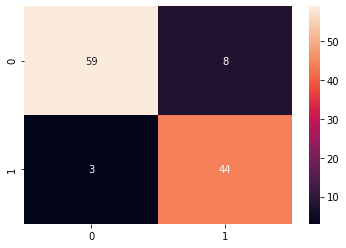

In [952]:
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

In [953]:
# The accuracy of the different classification models are: 
# Logistic Regression Classification - 92%
# Support Vector Classifier (kernel=linear) - 92%
# Support Vector Classifier (kernel= rbf) - 91%
# K Nearest NeighborsClassifier - 92%
# Naïve Bayes Algorithm - 90%
# Decision Tree Classifier - 90%
# Random Forest Classifier - 90%